In [4]:
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
# Retrieve Dataset (House Sales Prices) from GitHub repository for Deep Learning with MXNet Cookbook by Packt
!wget https://github.com/PacktPublishing/Deep-Learning-with-MXNet-Cookbook/raw/main/ch02/spam_ham_dataset.csv

--2023-10-26 18:10:43--  https://github.com/PacktPublishing/Deep-Learning-with-MXNet-Cookbook/raw/main/ch02/spam_ham_dataset.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PacktPublishing/Deep-Learning-with-MXNet-Cookbook/main/ch02/spam_ham_dataset.csv [following]
--2023-10-26 18:10:43--  https://raw.githubusercontent.com/PacktPublishing/Deep-Learning-with-MXNet-Cookbook/main/ch02/spam_ham_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5502589 (5.2M) [text/plain]
Saving to: ‘spam_ham_dataset.csv.3’

spam_ham_dataset.cs 100%[===================>]   5.25M  --.-KB/s    in 0.03s   

In [6]:
# Load data
emails_df = pd.read_csv("spam_ham_dataset.csv")

# Removing Unnecessary column
emails_df.drop("Unnamed: 0", axis=1, inplace=True)
# Changing column names
emails_df.columns = ["label", "text", "class"]

In [7]:
emails_df.shape

(5171, 3)

In [8]:
emails_df.head()

,label,text,class
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [9]:
emails_df.groupby("label").size()

label
ham     3672
spam    1499
dtype: int64

In [10]:
classes = ["Ham", "Spam"]

Text(0.5, 1.0, 'Examples per Class')

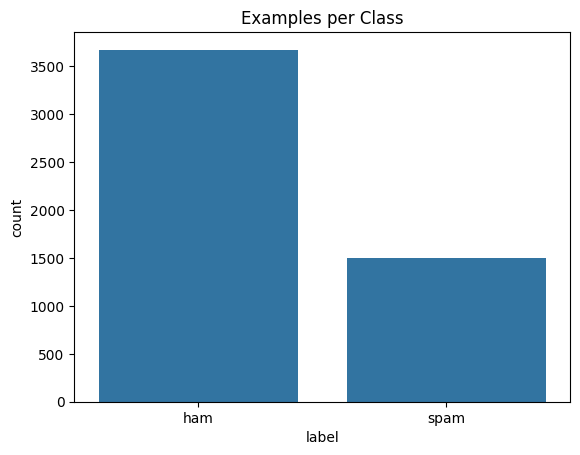

In [11]:
# Barplot describes the count of the class labels
sns.countplot(data=emails_df, x="label")
plt.title("Examples per Class")

Text(0.5, 1.0, 'Email Length Per Class')

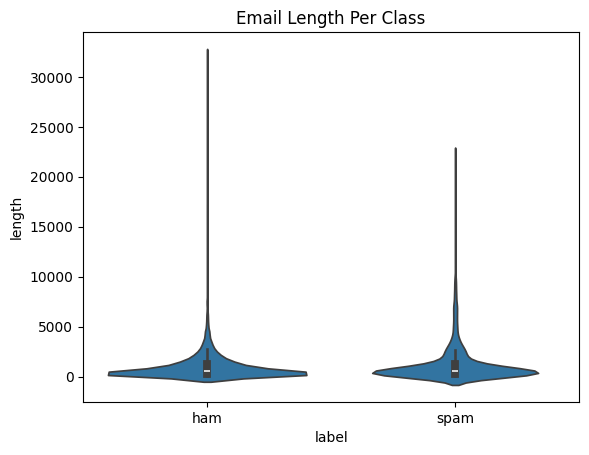

In [12]:
# Calculate Length of Emails
emails_df["length"] = emails_df["text"].apply(len)

# Violin Plot
sns.violinplot(x="label", y="length", data=emails_df)
plt.title("Email Length Per Class")

Text(0.5, 1.0, 'Email Length Per Class (less than 5000 characters)')

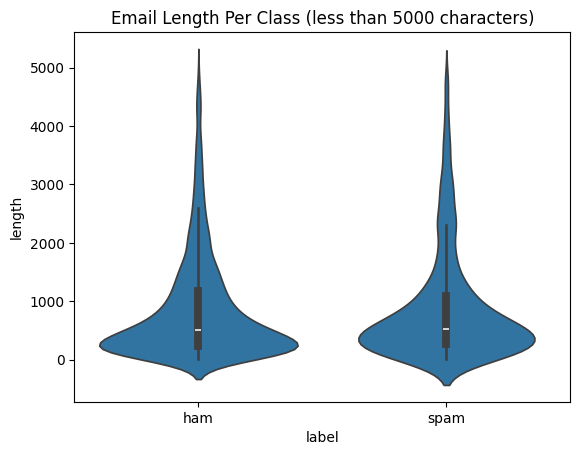

In [13]:
# Focus on less than 5000 characters emails
# Violin Plot
sns.violinplot(x="label", y="length", data=emails_df[emails_df["length"] < 5000])
plt.title("Email Length Per Class (less than 5000 characters)")

Text(0.5, 1.0, 'Email word count per class (emails with less than 5000 characters)')

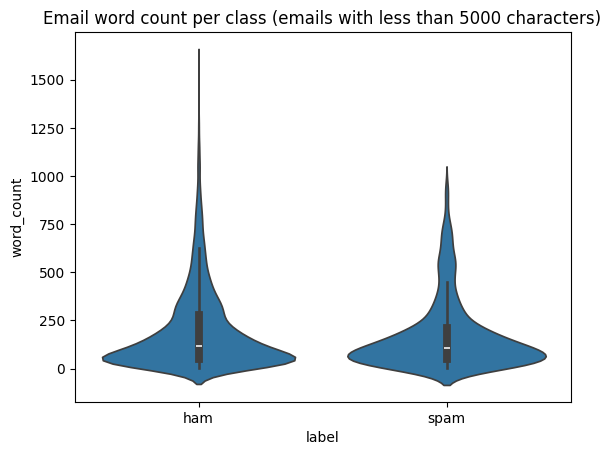

In [14]:
# Word Count
emails_df["word_count"] = emails_df["text"].str.split().str.len()

# Violin Plot
sns.violinplot(x="label", y="word_count", data=emails_df[emails_df["length"] < 5000])
plt.title("Email word count per class (emails with less than 5000 characters)")

In [15]:
# 20 Most Common Words
words_counter = collections.Counter(" ".join(emails_df["text"]).split())
words, frequency = zip(*words_counter.most_common(20))

/tmp/ipykernel_2399/710682285.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(words, rotation=45, rotation_mode="anchor", ha="right")


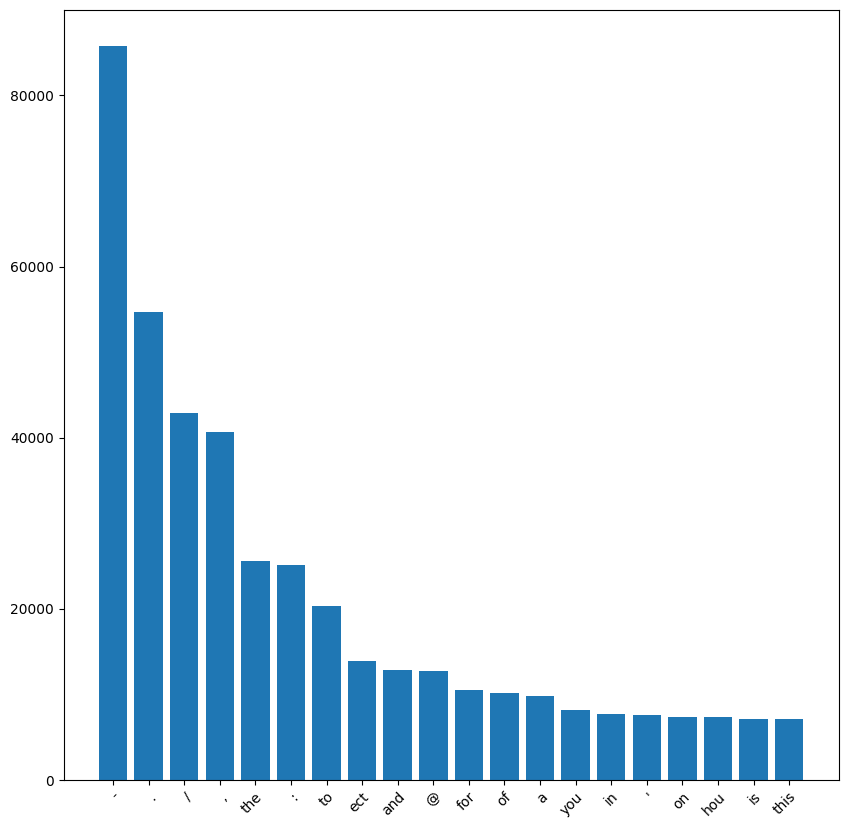

In [16]:
ax = plt.figure(figsize=(10, 10)).gca()
ax.bar(words, frequency)
ax.set_xticklabels(words, rotation=45, rotation_mode="anchor", ha="right")
plt.show()

In [17]:
import re
import string

In [18]:
# Cleaning the corpus (including word "subject")
def clean_text(text):
    """
    Makes text lowercase for better comparison.
    Removes punctuation, trailing characters, text between
    square brackets, words containing numbers and links.
    Also removes the word subject (part of emails structure)
    """
    text = str(text).lower()
    text = re.sub("\[.*?\']", '', text)
    text = re.sub("https?://\S+|www\.\S+", '', text)
    text = re.sub("<.*?>+", '', text)
    text = re.sub("[%s]" % re.escape(string.punctuation), '', text)
    text = re.sub("\n", ' ', text)
    text = re.sub("\w*\d\w*", '', text)
    text = re.sub("subject", '', text)
    text = re.sub("\\r", ' ', text)
    punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~`" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
    for p in punct:
        text = text.replace(p, '')
    return text

In [19]:
emails_df["text_clean"] = emails_df["text"].apply(clean_text)

In [20]:
# 20 Most Common Words in Clean Text
words_counter = collections.Counter(" ".join(emails_df["text_clean"]).split())
words, frequency = zip(*words_counter.most_common(20))

/tmp/ipykernel_2399/710682285.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(words, rotation=45, rotation_mode="anchor", ha="right")


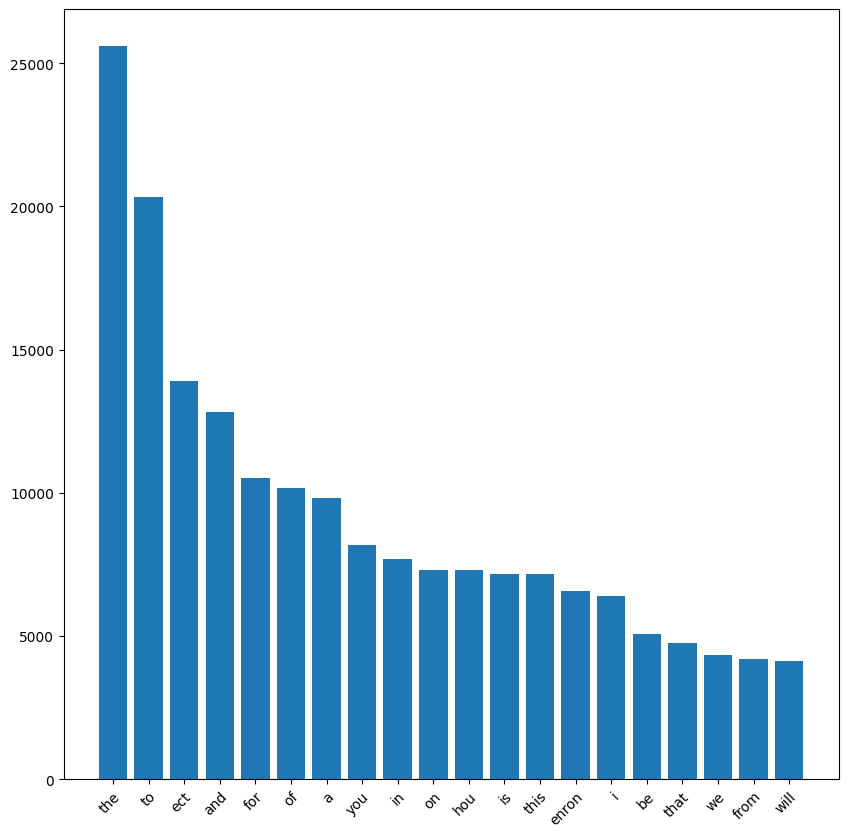

In [21]:
ax = plt.figure(figsize=(10, 10)).gca()
ax.bar(words, frequency)
ax.set_xticklabels(words, rotation=45, rotation_mode="anchor", ha="right")
plt.show()

In [23]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

stemmer = nltk.stem.snowball.EnglishStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     /home/sa_109024352321806746181/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sa_109024352321806746181/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/sa_109024352321806746181/nltk_data...


In [24]:
# Stop Words
stop_words = set(nltk.corpus.stopwords.words("english"))

In [25]:
# Bag Of Words
words_ham_raw  = ''.join(str(emails_df[emails_df["label"] == "ham"]["text_clean"].tolist()))
words_spam_raw = ''.join(str(emails_df[emails_df["label"] == "spam"]["text_clean"].tolist()))
words_all_raw = ''.join(str(emails_df["text_clean"].tolist()))

In [26]:
def process_words(
    text,
    stop_words=stop_words,
    stemmer = stemmer,
    lemmatizer = lemmatizer):
    
    words = nltk.tokenize.word_tokenize(text)
       
    filtered_words_pre = []
    filtered_words_post = []
    
    for word in words:
        
        if word not in stop_words and word.isalpha():
            filtered_words_pre.append(word)
            word = stemmer.stem(word)
            filtered_words_post.append(lemmatizer.lemmatize(word))
    
    return filtered_words_pre, filtered_words_post

In [27]:
words_ham_pre,  words_ham  = process_words(words_ham_raw)
words_spam_pre, words_spam = process_words(words_spam_raw)
words_all_pre,  words_all  = process_words(words_all_raw)

In [28]:
print("Raw Corpus (Ham):", len(words_ham_raw))
print("Processed Corpus (Ham):", len(words_ham), "(~{:d}%)".format(int(len(words_ham) / len(words_ham_raw) * 100)))
print("Raw Corpus (Spam):", len(words_spam_raw))
print("Processed Corpus (Spam):", len(words_spam), "(~{:d}%)".format(int(len(words_spam) / len(words_spam_raw) * 100)))

Raw Corpus (Ham): 3133632
Processed Corpus (Ham): 317496 (~10%)
Raw Corpus (Spam): 1712737
Processed Corpus (Spam): 177780 (~10%)


In [29]:
# N-grams (All words)
bigrams_series_all = (pd.Series(nltk.ngrams(words_all, 2)).value_counts())[:10]
trigrams_series_all = (pd.Series(nltk.ngrams(words_all, 3)).value_counts())[:10]

Text(0.5, 0, '# of Occurrences')

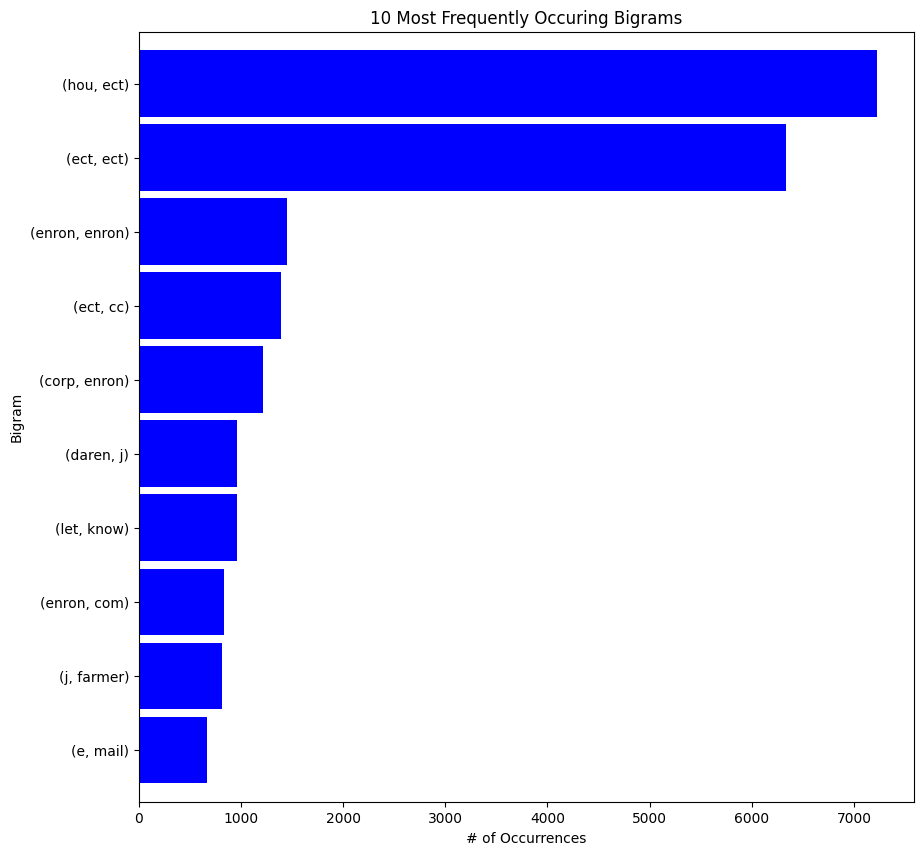

In [30]:
# Bigram Plot (all)
bigrams_series_all.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 10))
plt.title('10 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')

Text(0.5, 0, '# of Occurrences')

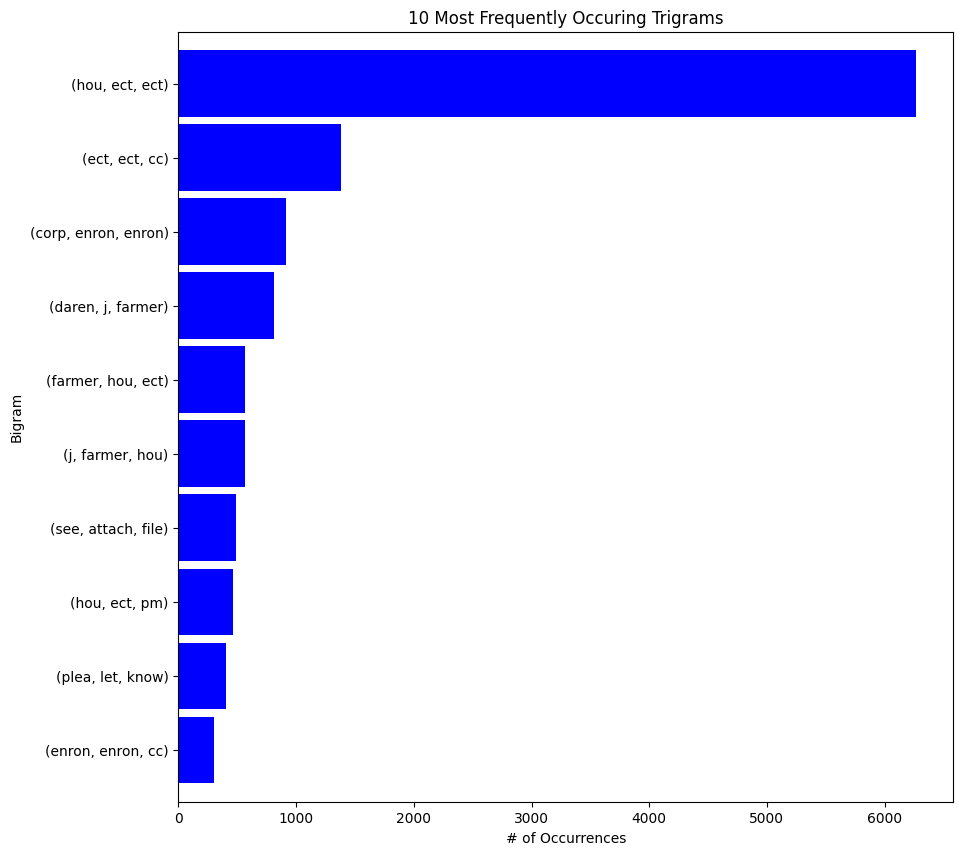

In [31]:
# Trigram Plot (all)
trigrams_series_all.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 10))
plt.title('10 Most Frequently Occuring Trigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')

In [32]:
# N-grams (Ham)
bigrams_series_ham = (pd.Series(nltk.ngrams(words_ham, 2)).value_counts())[:10]
trigrams_series_ham = (pd.Series(nltk.ngrams(words_ham, 3)).value_counts())[:10]

Text(0.5, 0, '# of Occurrences')

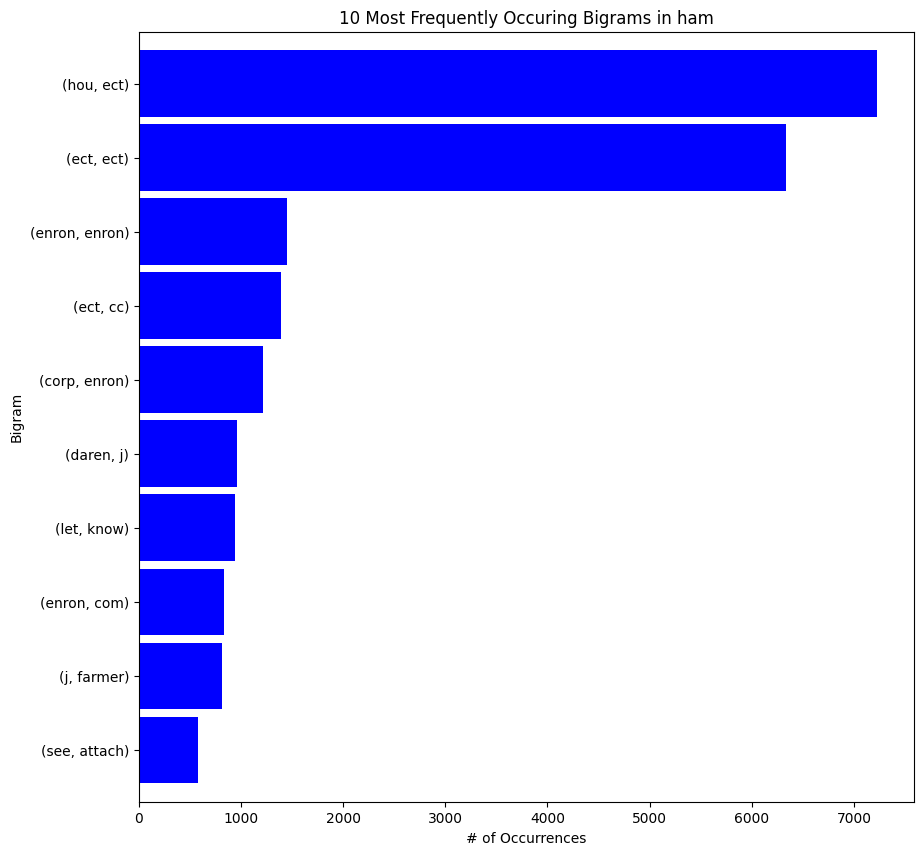

In [33]:
# Ham Bigram Plot
bigrams_series_ham.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 10))
plt.title('10 Most Frequently Occuring Bigrams in ham')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')

Text(0.5, 0, '# of Occurrences')

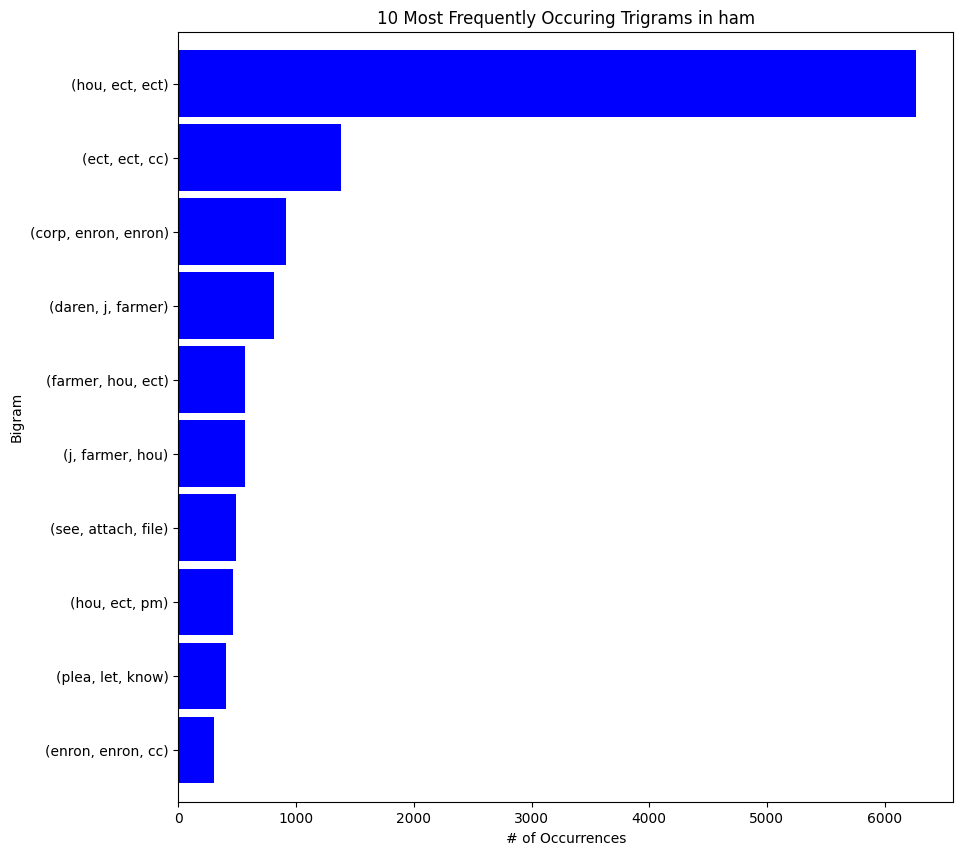

In [34]:
# Ham Trigram Plot
trigrams_series_ham.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 10))
plt.title('10 Most Frequently Occuring Trigrams in ham')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')

In [35]:
# N-grams (Spam)
bigrams_series_spam = (pd.Series(nltk.ngrams(words_spam, 2)).value_counts())[:10]
trigrams_series_spam = (pd.Series(nltk.ngrams(words_spam, 3)).value_counts())[:10]

Text(0.5, 0, '# of Occurrences')

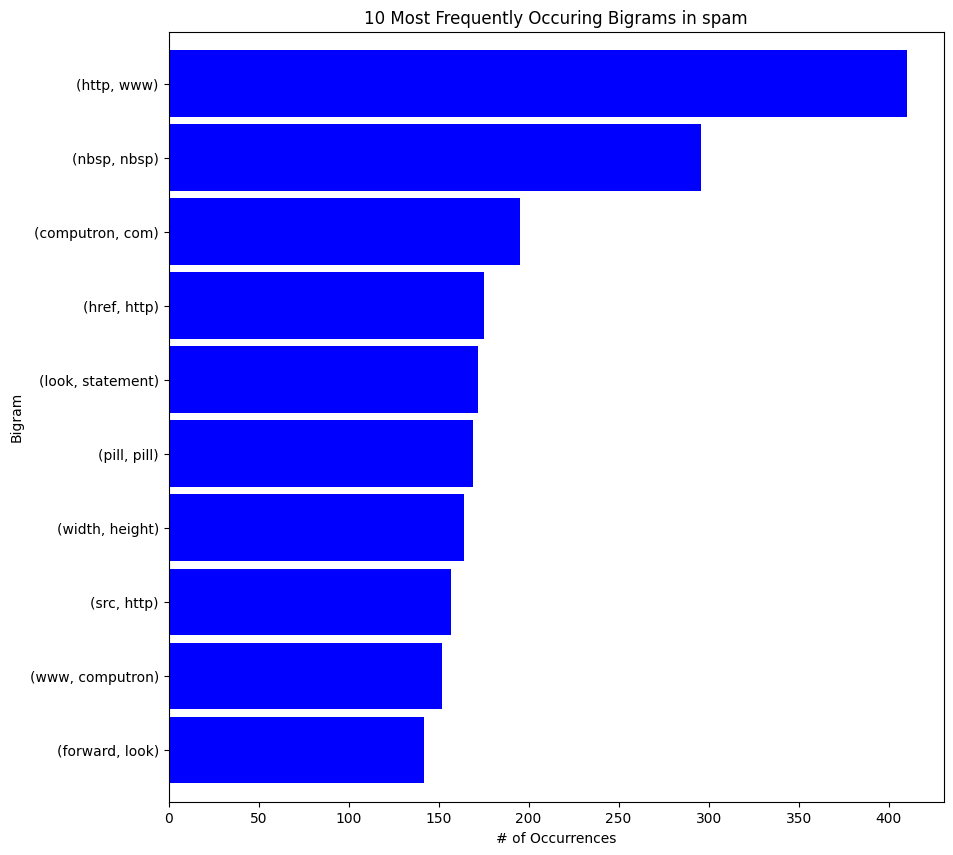

In [36]:
bigrams_series_spam.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 10))
plt.title('10 Most Frequently Occuring Bigrams in spam')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')

Text(0.5, 0, '# of Occurrences')

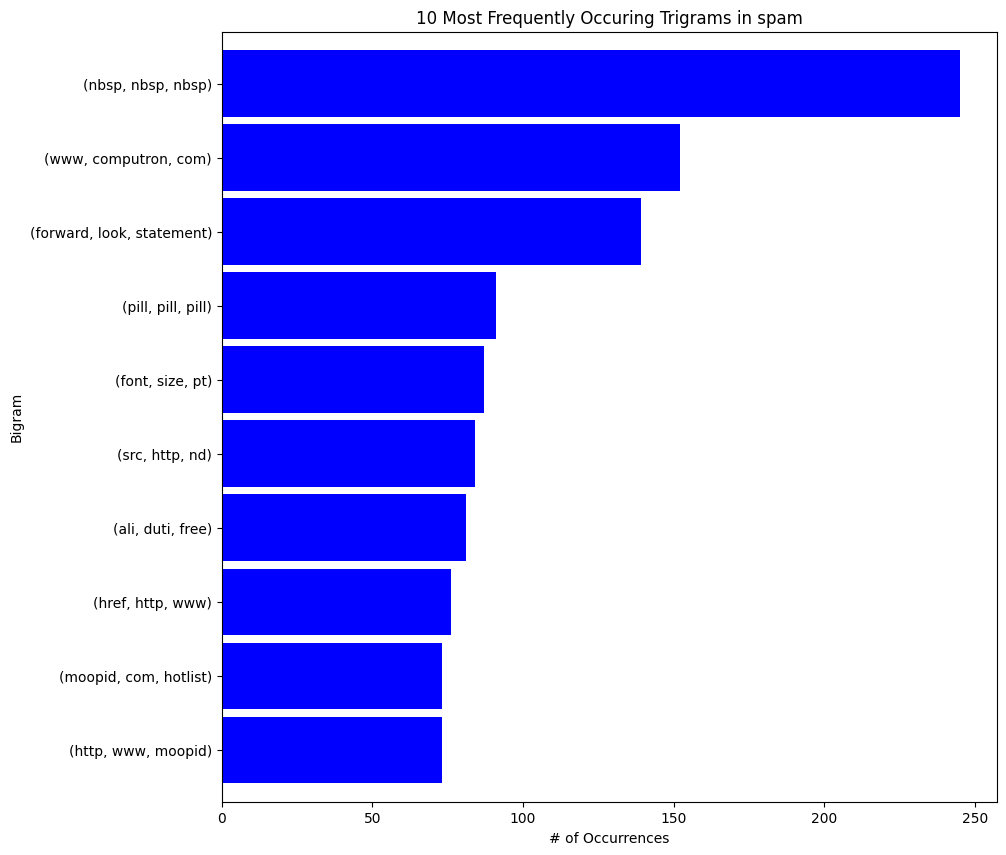

In [37]:
trigrams_series_spam.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 10))
plt.title('10 Most Frequently Occuring Trigrams in spam')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')

In [39]:
import wordcloud

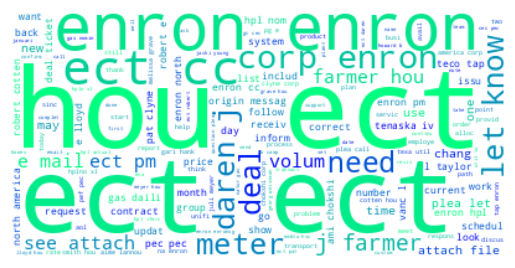

In [40]:
word_cloud = wordcloud.WordCloud(background_color="white", colormap="winter")
word_cloud.generate(",".join(words_ham))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

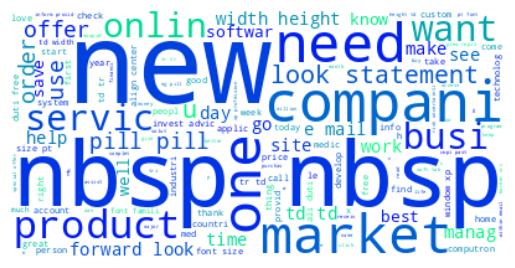

In [41]:
word_cloud = wordcloud.WordCloud(background_color="white", colormap="winter")
word_cloud.generate(",".join(words_spam))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [43]:
# Word2Vec Representation
from gensim import downloader

In [44]:
w2v = downloader.load("word2vec-google-news-300")

[--------------------------------------------------] 1.4% 23.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==------------------------------------------------] 4.1% 67.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===-----------------------------------------------] 6.7% 111.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 9.4% 156.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[======--------------------------------------------] 12.1% 200.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 14.8% 246.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 17.5% 291.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========----------------------------------------] 20.2% 335.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========---------------------------------------] 22.9% 380.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 25.6% 425.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============------------------------------------] 28.2% 469.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============-----------------------------------] 30.9% 513.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 33.6% 558.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================--------------------------------] 36.3% 603.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===================-------------------------------] 39.1% 649.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====================------------------------------] 41.8% 694.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[======================----------------------------] 44.5% 739.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======================---------------------------] 47.2% 785.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========================--------------------------] 49.9% 829.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========================------------------------] 52.6% 874.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 55.3% 919.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=============================---------------------] 58.0% 964.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 60.7% 1009.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============================-------------------] 63.5% 1055.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 66.2% 1100.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================================----------------] 68.9% 1145.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===================================---------------] 71.6% 1191.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 74.4% 1236.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[======================================------------] 77.1% 1281.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======================================-----------] 79.8% 1326.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=========================================---------] 82.4% 1370.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========================================--------] 85.2% 1416.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========================================-------] 87.9% 1462.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=============================================-----] 90.7% 1508.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============================================---] 94.1% 1565.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================================================--] 96.8% 1610.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================-] 99.6% 1656.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [45]:
# One example of a vector (showing only 5 first features)
index = 5

print(words_ham_pre[index])
print(w2v[words_ham_pre[index]][:5])
print(words_spam_pre[index])
print(w2v[words_spam_pre[index]][:5])

gave
[ 0.22265625 -0.01660156  0.13476562 -0.13378906  0.1953125 ]
trending
[-0.10693359 -0.1015625  -0.265625   -0.0246582  -0.24414062]


In [46]:
math_weaker = w2v["stronger"] - w2v["strong"] + w2v["weak"]

In [47]:
np.linalg.norm(math_weaker - w2v["weaker"])

1.936865

In [48]:
np.linalg.norm(w2v["person"] - w2v["animal"])

3.2777858

In [49]:
w2v.most_similar("king")

[('kings', 0.7138045430183411),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864824056625366),
 ('ruler', 0.5797567367553711),
 ('princes', 0.5646552443504333),
 ('Prince_Paras', 0.5432944297790527),
 ('throne', 0.5422105193138123)]

In [51]:
# # GloVe Representation
# glove = {}
# with open("glove.6B.50d.txt", 'r', encoding="utf-8") as f:
#     for line in f:
#         values = line.split()
#         word = values[0]
#         vector = np.asarray(values[1:], "float32")
#         glove[word] = vector

# Another way (memory intensive)
glove = downloader.load("glove-wiki-gigaword-50")

[=================---------------------------------] 35.5% 23.4/66.0MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 66.0/66.0MB downloaded


In [52]:
math_weaker = glove["stronger"] - glove["strong"] + glove["weak"]

In [53]:
np.linalg.norm(math_weaker - glove["weaker"])

2.535143

In [54]:
np.linalg.norm(glove["strong"] - glove["weak"])

3.0656097

In [55]:
# Visualization for word2vec
vectors_ham = []

for word in set(words_ham_pre):
    if word in w2v.key_to_index:
        vectors_ham.append(w2v[word])

vectors_spam = []

for word in set(words_spam_pre):
    if word in w2v.key_to_index:
        vectors_spam.append(w2v[word])      

In [59]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [64]:
# PCA Calculation (3 components)
pca = PCA(n_components=3)

pca_df = pd.DataFrame(columns=["x", "y", "z", "class"])

pca_result = pca.fit_transform(vectors_ham)

new_df = pd.DataFrame({
    "x": pca_result[:, 0],
    "y": pca_result[:, 1],
    "z": pca_result[:, 2],
    "class": 0
    })

# pca_df = pca_df.append(new_df, ignore_index=True)
pca_df = pd.concat([pca_df, new_df])

pca_result = pca.fit_transform(vectors_spam)

new_df = pd.DataFrame({
    "x": pca_result[:, 0],
    "y": pca_result[:, 1],
    "z": pca_result[:, 2],
    "class": 1
    })

# pca_df = pca_df.append(new_df, ignore_index=True)
pca_df = pd.concat([pca_df, new_df])

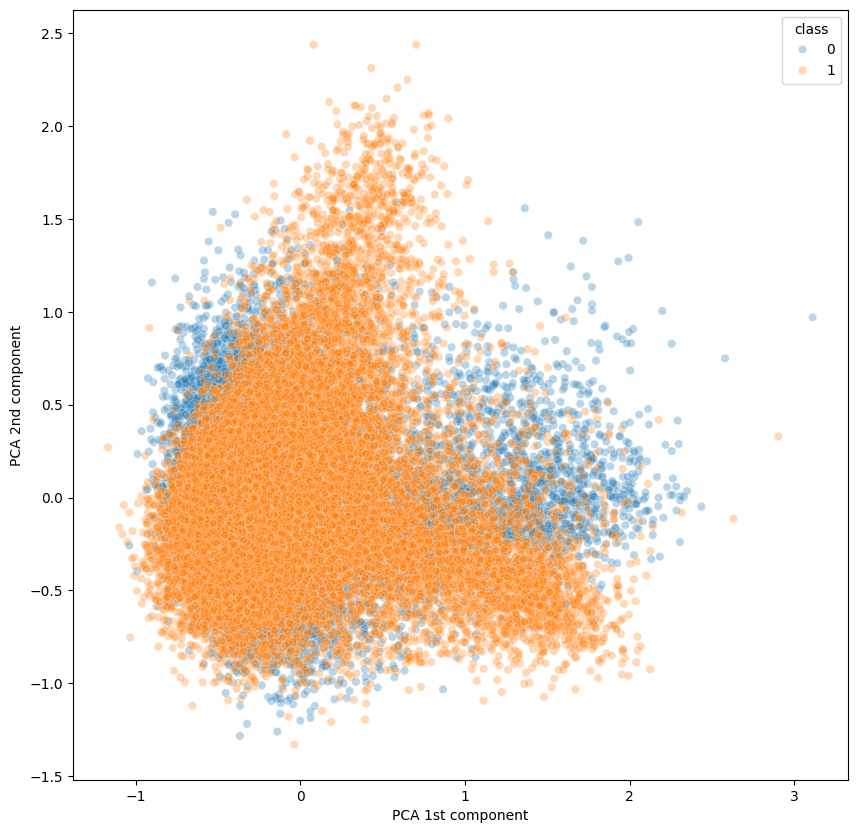

In [65]:
# PCA 2D Plot
plt.figure(figsize=(10, 10))

sns.scatterplot(
    data = pca_df,
    x = "x",
    y = "y",
    hue = "class",
    legend = "full",
    alpha = 0.3
)

# Modify Legend and Labels
plt.xlabel("PCA 1st component")
plt.ylabel("PCA 2nd component")

plt.show()

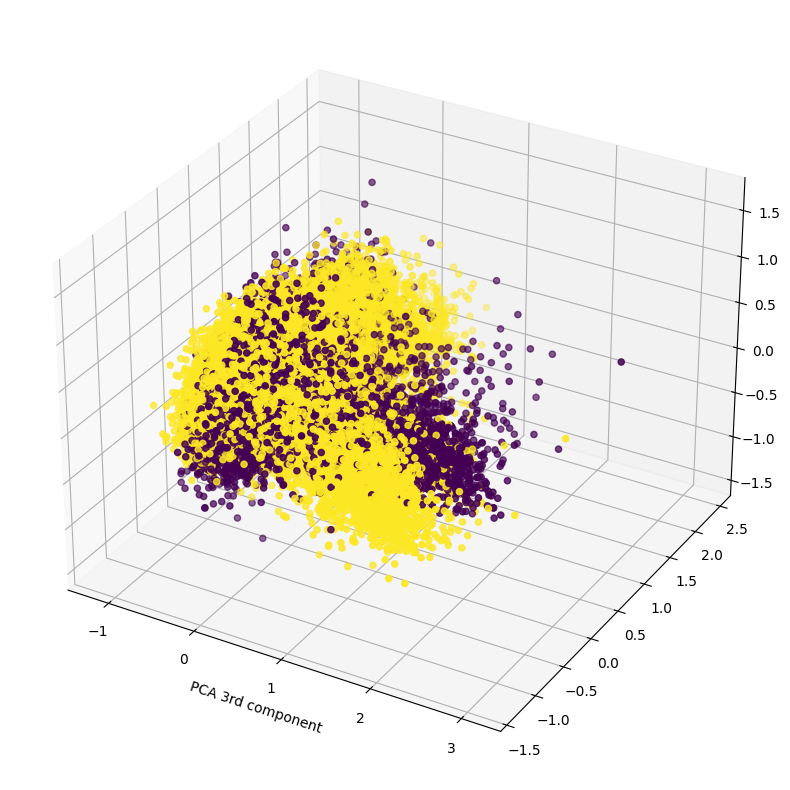

In [66]:
# PCA 3D Plot
ax = plt.figure(figsize=(10, 10)).add_subplot(projection='3d')

ax.scatter(
    xs=pca_df["x"],
    ys=pca_df["y"],
    zs=pca_df["z"],
    c=pca_df["class"]
)

# Modify Legend and Labels
ax.set_xlabel("PCA 1st component")
ax.set_xlabel("PCA 2nd component")
ax.set_xlabel("PCA 3rd component")

plt.show()

In [67]:
# t-SNE
pca = PCA(n_components=50)
pca = pca.fit(vectors_ham[:1000])
pca = pca.fit(vectors_spam[:1000])

tsne_df = pd.DataFrame(columns=["x", "y", "z", "class"])

tsne = TSNE(n_components=3)

In [69]:
pca_result = pca.transform(vectors_ham[:1000])

tsne_result = tsne.fit_transform(pca_result)

In [70]:
new_df = pd.DataFrame({
    "x": tsne_result[:, 0],
    "y": tsne_result[:, 1],
    "z": tsne_result[:, 2],
    "class": 0
    })

# tsne_df = tsne_df.append(new_df, ignore_index=True)
tsne_df = pd.concat([tsne_df, new_df])

In [71]:
pca_result = pca.transform(vectors_spam[:1000])

tsne_result = tsne.fit_transform(pca_result)

In [72]:
new_df = pd.DataFrame({
    "x": tsne_result[:, 0],
    "y": tsne_result[:, 1],
    "z": tsne_result[:, 2],
    "class": 1
    })

# tsne_df = tsne_df.append(new_df, ignore_index=True)
tsne_df = pd.concat([tsne_df, new_df])

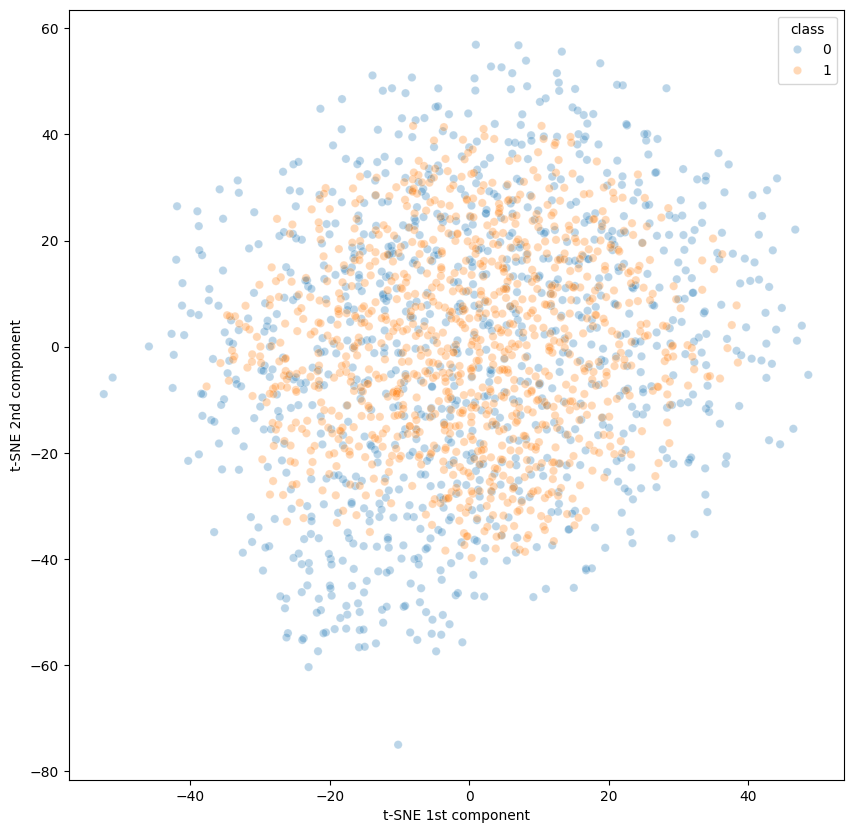

In [73]:
# t-SNE Plot
plt.figure(figsize=(10, 10))

sns.scatterplot(
    data = tsne_df,
    x = "x",
    y = "y",
    hue = "class",
    legend = "full",
    alpha = 0.3
)

# Modify Legend and Labels
plt.xlabel("t-SNE 1st component")
plt.ylabel("t-SNE 2nd component")

plt.show()

In [74]:
# Visualization for GloVe
vectors_ham = []

for word in set(words_ham_pre):
    if word in glove:
        vectors_ham.append(glove[word])

vectors_spam = []

for word in set(words_spam_pre):
    if word in glove:
        vectors_spam.append(glove[word])

In [75]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [76]:
# PCA Calculation (3 components)
pca = PCA(n_components=3)

pca_df = pd.DataFrame(columns=["x", "y", "z", "class"])

pca_result = pca.fit_transform(vectors_ham)

new_df = pd.DataFrame({
    "x": pca_result[:, 0],
    "y": pca_result[:, 1],
    "z": pca_result[:, 2],
    "class": 0
    })

# pca_df = pca_df.append(new_df, ignore_index=True)
pca_df = pd.concat([pca_df, new_df])

pca_result = pca.fit_transform(vectors_spam)

new_df = pd.DataFrame({
    "x": pca_result[:, 0],
    "y": pca_result[:, 1],
    "z": pca_result[:, 2],
    "class": 1
    })

# pca_df = pca_df.append(new_df, ignore_index=True)
pca_df = pd.concat([pca_df, new_df])

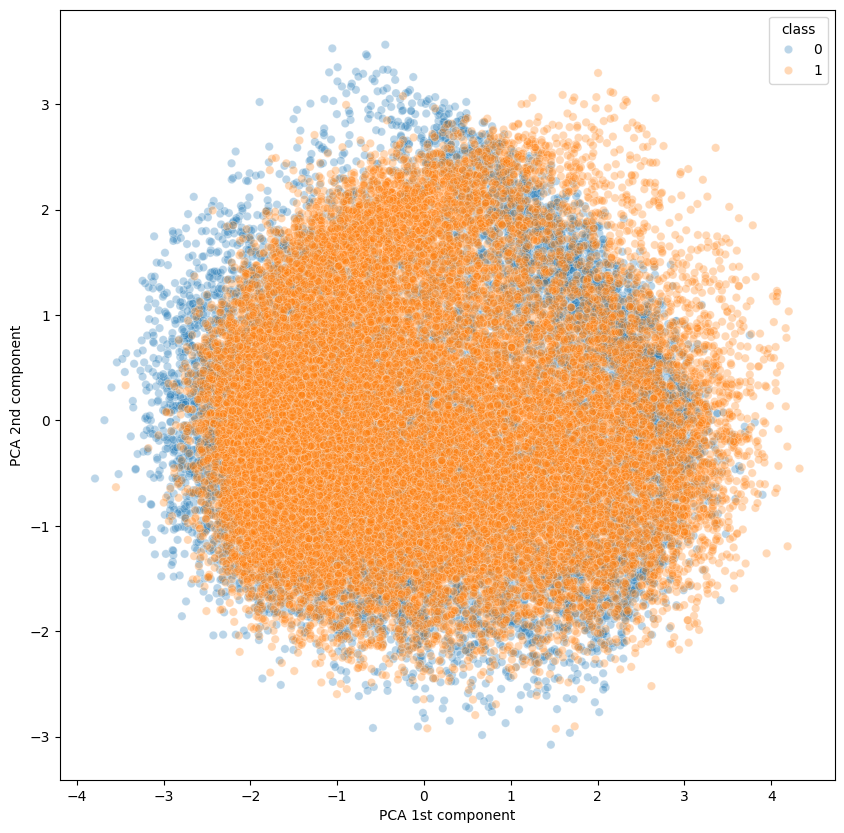

In [77]:
# PCA 2D Plot
plt.figure(figsize=(10, 10))

sns.scatterplot(
    data = pca_df,
    x = "x",
    y = "y",
    hue = "class",
    legend = "full",
    alpha = 0.3
)

# Modify Legend and Labels
plt.xlabel("PCA 1st component")
plt.ylabel("PCA 2nd component")

plt.show()

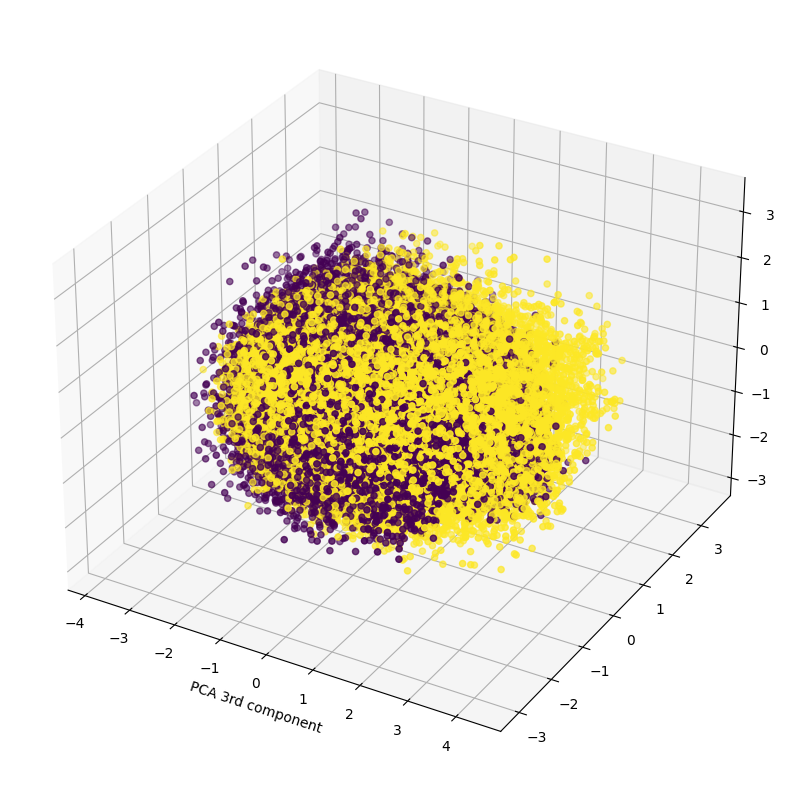

In [78]:
# PCA 3D Plot
ax = plt.figure(figsize=(10, 10)).add_subplot(projection='3d')

ax.scatter(
    xs=pca_df["x"],
    ys=pca_df["y"],
    zs=pca_df["z"],
    c=pca_df["class"]
)

# Modify Legend and Labels
ax.set_xlabel("PCA 1st component")
ax.set_xlabel("PCA 2nd component")
ax.set_xlabel("PCA 3rd component")

plt.show()

In [79]:
# t-SNE for GloVe (already 50 features, no need to PCA)
tsne_df = pd.DataFrame(columns=["x", "y", "z", "class"])

tsne = TSNE(n_components=3)

In [85]:
vectors_all = np.array(vectors_ham[:1000] + vectors_spam[:1000])

In [86]:
tsne_result = tsne.fit_transform(vectors_all)

In [117]:
len(np.concatenate((np.zeros((1, 1000)), np.ones((1, 1000))), axis=None))

2000

In [118]:
new_df = pd.DataFrame({
    "x": tsne_result[:, 0],
    "y": tsne_result[:, 1],
    "z": tsne_result[:, 2],
    "class": np.concatenate((np.zeros((1, 1000)), np.ones((1, 1000))), axis=None)
    })

# tsne_df = tsne_df.append(new_df, ignore_index=True)
tsne_df = pd.concat([tsne_df, new_df])

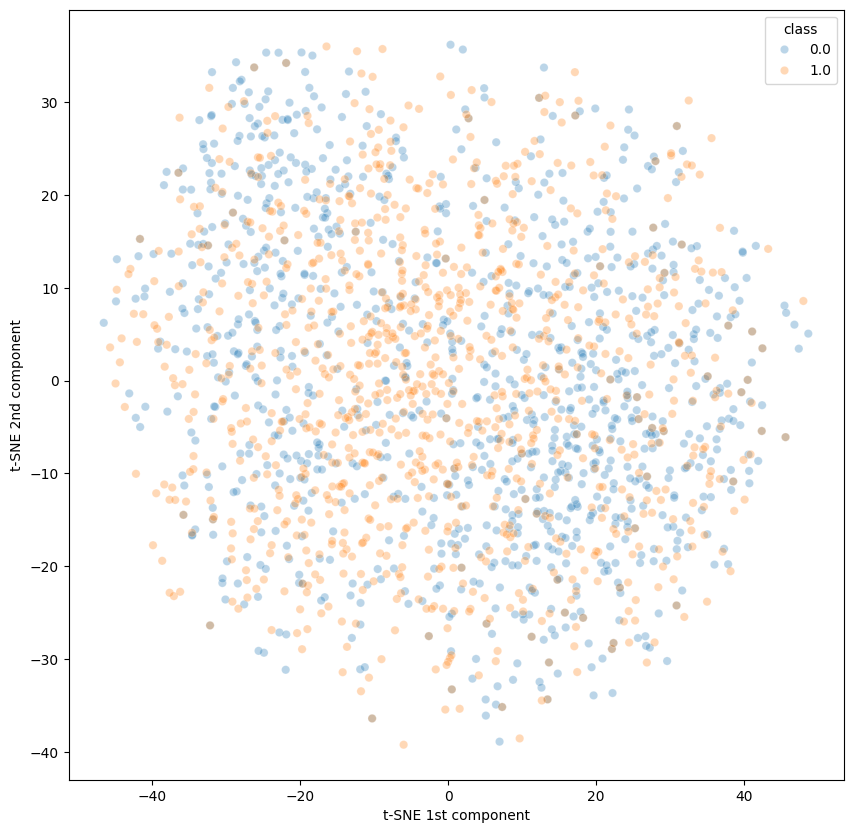

In [119]:
# t-SNE Plot
plt.figure(figsize=(10, 10))

sns.scatterplot(
    data = tsne_df,
    x = "x",
    y = "y",
    hue = "class",
    legend = "full",
    alpha = 0.3
)

# Modify Legend and Labels
plt.xlabel("t-SNE 1st component")
plt.ylabel("t-SNE 2nd component")

plt.show()